In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import datetime as dt
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

# 1. Random Forest Regressor

In [1]:
class TreeEnsemble():
    def __init__(self, x, y, nTrees, sampleSize, minLeaf = 5):
        np.random.seed(42)
        self.x, self.y, self.nTrees, self.sampleSize, self.minLeaf = x, y, nTrees, sampleSize, minLeaf
        self.trees = [self.createTree() for i in range(nTrees)]

    def createTree(self):
        randomIndexes = np.random.permutation(len(self.y))[:self.sampleSize]
        return DecisionTree(self.x[randomIndexes], self.y[randomIndexes], minLeaf = self.minLeaf)

    def predict(self, x):
        return np.mean([tree.predict(x) for tree in self.trees], axis = 0)

In [2]:
class DecisionTree():
    def __init__(self, x, y, indexes = None, minLeaf = 5):
        if indexes is None: indexes = np.arange(len(y)) 
        self.x, self.y, self.indexes, self.minLeaf = x, y, indexes, minLeaf
        self.nRows, self.nColumns = len(indexes), x.shape[1]
        self.value = np.mean(y[indexes])
        self.score = float('inf')
        self.findVariableSplit()
        
    def findVariableSplit(self):
        for i in range(self.nColumns):
            self.findBetterSplit(i)
            
    def findBetterSplit(self, variableIndexes): pass
    
    @property
    def splitName(self):
        return self.x.columns[self.variableIndexes]
    
    @property
    def splitColumn(self):
        return self.x.values[self.indexes, self.variableIndexes]
    
    @property
    def isLeaf(self):
        return self.score == float('inf')
    
    def __repr__(self):
        toPrint = f'nRows = {self.nRows}; value = {self.value}'
        if not self.isLeaf:
            toPrint += f' score: {self.score}; split: {self.split}; variable: {self.splitName}'
        return toPrint

In [3]:
def findBetterSplit(self, variableIndexes):
    x, y = self.x[self.indexes, variableIndexes], self.y[self.indexes]
    
    for i in range(1, self.nRows - 1):
        leftHandSide = x <= x[i]
        rightHandSide = x > x[i]
        
        if rightHandSide.sum() == 0: 
            continue
            
        leftHandSideSTD = y[leftHandSide].std()
        rightHandSideSTD = y[rightHandSide].std()
        
        #RMSE je do konstante jednaka ovom izrazu
        currentScore = leftHandSideSTD * leftHandSide.sum() + rightHandSideSTD + rightHandSide.sum()
        
        if currentScore < self.score:
            self.variableIndexes, self.score, self.split = variableIndexes, currentScore, x[i]

## 1.1 Speeding Things Up

In [4]:
def stDev(count, s1, s2):
    return math.sqrt((s2/count) - (s1/count)**2)

def findBetterSplit(self, variableIndexes):
    x, y = self.x.values[self.indexes, variableIndexes], self.y[self.indexes]
    
    sortIndexes = np.argsort(x)
    ySorted, xSorted = y[sortIndexes], x[sortIndexes]
    
    rhsCount, rhsSum, rhsSumSquares = self.nRows, ySorted.sum(), (ySorted**2).sum()
    lhsCount, lhsSum, lhsSumSquares = 0, 0.0, 0.0
    
    for i in range(0, self.nRows - self.minLeaf - 1):
        xi, yi = xSorted[i], ySorted[i]
        lhsCount += 1
        rhsCount -= 1
        
        lhsSum += yi
        rhsSum -= yi
        
        lhsSumSquares += yi**2
        rhsSumSquares -= yi**2
        
        if i < self.minLeaf or xi == xSorted[i+1]:
            continue
        
        lhsSTD = stDev(lhsCount, lhsSum, lhsSumSquares)
        rhsSTD = stDev(rhsCount, rhsSum, rhsSumSquares)
        
        currentScore = lhsSTD * lhsCount + rhsSTD * rhsCount
        
        if currentScore < self.score:
            self.variableIndexes, self.score, self.split = variableIndexes, currentScore, xi

In [5]:
DecisionTree.findBetterSplit = findBetterSplit

In [6]:
def findVariableSplit(self):
    for i in range(self.nColumns):
        self.findBetterSplit(i)
    if self.isLeaf:
        return
    x = self.splitColumn
    lhs = np.nonzero(x <= self.split)[0]
    rhs = np.nonzero(x >  self.split)[0]
    self.lhs = DecisionTree(self.x, self.y, self.indexes[lhs])
    self.rhs = DecisionTree(self.x, self.y, self.indexes[rhs])

In [7]:
DecisionTree.findVariableSplit = findVariableSplit

In [8]:
def predict(self, x):
    return np.array([self.predictRow(xi) for xi in x ])

DecisionTree.predict = predict

In [9]:
def predictRow(self, xi):
    if self.isLeaf:
        return self.value
    t = self.lhs if xi[self.variableIndex] <= self.split else self.rhs
#  The line above is equivalent to the 4 following lines
#     if xi[self.variableIndex]
#         t = self.lhs
#     else:
#         t = self.rhs
#     return t.predictRow(xi)

DecisionTree.predictRow = predictRow

## 1.2 Putting It All Together

In [1]:
class TreeEnsemble():
    def __init__(self, x, y, nTrees, sampleSize, minLeaf = 5):
        np.random.seed(42)
        self.x, self.y, self.nTrees, self.sampleSize, self.minLeaf = x, y, nTrees, sampleSize, minLeaf
        self.trees = [self.createTree() for i in range(nTrees)]

    def createTree(self):
        randomIndexes = np.random.permutation(len(self.y))[:self.sampleSize]
        return DecisionTree(self.x[randomIndexes], self.y[randomIndexes], minLeaf = self.minLeaf)

    def predict(self, x):
        return np.mean(np.array([tree.predict(x) for tree in self.trees]), axis = 0)

In [2]:
def stDev(count, s1, s2):
    return math.sqrt((s2/count) - (s1/count)**2)

In [3]:
class DecisionTree():
    def __init__(self, x, y, indexes = None, minLeaf = 5):
        if indexes is None: indexes = np.arange(len(y)) 
        self.x, self.y, self.indexes, self.minLeaf = x, y, indexes, minLeaf
        self.nRows, self.nColumns = len(indexes), x.shape[1]
        self.value = np.mean(y[indexes])
        self.score = float('inf')
        self.findVariableSplit()
        
    def findVariableSplit(self):
        for i in range(self.nColumns):
            self.findBetterSplit(i)
        if self.isLeaf:
            return
        x = self.splitColumn
        lhs = np.nonzero(x <= self.split)[0]
        rhs = np.nonzero(x >  self.split)[0]
        self.lhs = DecisionTree(self.x, self.y, self.indexes[lhs])
        self.rhs = DecisionTree(self.x, self.y, self.indexes[rhs])

    def findBetterSplit(self, variableIndexes):
        x, y = self.x[self.indexes, variableIndexes], self.y[self.indexes]

        sortIndexes = np.argsort(x)
        ySorted, xSorted = y[sortIndexes], x[sortIndexes]

        rhsCount, rhsSum, rhsSumSquares = self.nRows, ySorted.sum(), (ySorted**2).sum()
        lhsCount, lhsSum, lhsSumSquares = 0, 0.0, 0.0

        for i in range(0, self.nRows - self.minLeaf - 1):
            xi, yi = xSorted[i], ySorted[i]
            lhsCount += 1
            rhsCount -= 1

            lhsSum += yi
            rhsSum -= yi

            lhsSumSquares += yi**2
            rhsSumSquares -= yi**2

            if i < self.minLeaf or xi == xSorted[i+1]:
                continue

            lhsSTD = stDev(lhsCount, lhsSum, lhsSumSquares)
            rhsSTD = stDev(rhsCount, rhsSum, rhsSumSquares)

            currentScore = lhsSTD * lhsCount + rhsSTD * rhsCount

            if currentScore < self.score:
                self.variableIndexes, self.score, self.split = variableIndexes, currentScore, xi
    
    @property
    def splitName(self):
        return self.x.columns[self.variableIndexes]
    
    @property
    def splitColumn(self):
        return self.x[self.indexes, self.variableIndexes]
    
    @property
    def isLeaf(self):
        return self.score == float('inf')
    
    def __repr__(self):
        toPrint = f'nRows = {self.nRows}; value = {self.value}'
        if not self.isLeaf:
            toPrint += f' score: {self.score}; split: {self.split}; variable: {self.splitName}'
        return toPrint
    
    def predict(self, x):
        return np.array([self.predictRow(xi) for xi in x ])
    
    def predictRow(self, xi):
        if self.isLeaf:
            return self.value
        t = self.lhs if xi[self.variableIndexes] <= self.split else self.rhs
        return t.predictRow(xi)

# 2. Cleaning And Preparing The Data

In [6]:
#Ucitavanje EXCEL fajla
#Izbacivanje featurea- 'Maximum speed of wind' zato sto je sve NaN

dataAll = pd.read_excel('DATASET.xlsx')
dataAll = dataAll.drop('Maximum speed of wind', axis = 1)

#Missing vrednosti su predstavljene sa '-' 
dataAll.replace('-',np.nan, inplace = True)

#Mislimo da nam za predikcijiu mogu znaciti feature-i 'Godina', 'Mesec', 'Dan u mesecu'
dataAll['Day'] = pd.to_datetime(dataAll['Day'])
dataAll['Year'] = dataAll.Day.map(lambda x: x.year)
dataAll['Month'] = dataAll.Day.map(lambda x: x.month)
dataAll['DayOfMonth'] = dataAll.Day.map(lambda x: x.day)

#Izbacujemo pocetni datum
dataAll = dataAll.drop('Day', axis = 'columns')

#Izbacujemo redove koje imaju vise od jednog missing values (jedan moze da ima za Output)
dataAll = dataAll[~(dataAll.isnull().sum(axis = 1) > 1)]

#Prebacivanje iz str u numeric (int ili float)
numericTypeColumns = list(dataAll.columns)

for column in numericTypeColumns:
    dataAll[column] = pd.to_numeric(dataAll[column])

In [7]:
#Delimo Data Set na train i test podatke (u zavisnosti da li je output missing ili ne)

dataTest = dataAll[dataAll.Output.isnull()].reset_index().drop('index', axis = 1)

dataTrain = dataAll[~dataAll.Output.isnull()].reset_index().drop('index', axis = 1)
dataTrain = dataTrain[~(dataTrain.isnull().sum(axis = 1) > 0)]

In [8]:
#Za train podatke, izbacujemo 'Output' kolonu jer ne treba na njoj da treniramo algoritam

yTrain = dataTrain.Output.reset_index().drop('index', axis = 1).values
xTrain = dataTrain.drop('Output', axis = 'columns').reset_index().drop('index', axis = 1).values

xTest = dataTest.drop('Output', axis = 'columns').values

In [9]:
dataTest = dataAll[dataAll.Output.isnull()].reset_index().drop('index', axis = 1)

dataTrain = dataAll[~dataAll.Output.isnull()].reset_index().drop('index', axis = 1)
dataTrain = dataTrain[~(dataTrain.isnull().sum(axis = 1) > 0)]

In [10]:
dataTrain2013 = dataTrain[(dataTrain.Year == 2013)]
dataTrain2014 = dataTrain[(dataTrain.Year == 2014)]
dataTrain2015 = dataTrain[(dataTrain.Year == 2015)]

dataTrainNo2013 = dataTrain[~(dataTrain.Year == 2013)]
dataTrainNo2014 = dataTrain[~(dataTrain.Year == 2014)]
dataTrainNo2015 = dataTrain[~(dataTrain.Year == 2015)]

#Za train podatke, izbacujemo 'Output' kolonu jer ne treba na njoj da treniramo algoritam

xTrain2013 = dataTrain2013.drop('Output', axis = 'columns').reset_index().drop('index', axis = 1).values
xTrain2014 = dataTrain2014.drop('Output', axis = 'columns').reset_index().drop('index', axis = 1).values
xTrain2015 = dataTrain2015.drop('Output', axis = 'columns').reset_index().drop('index', axis = 1).values

xTrainNo2013 = dataTrainNo2013.drop('Output', axis = 'columns').reset_index().drop('index', axis = 1).values
xTrainNo2014 = dataTrainNo2014.drop('Output', axis = 'columns').reset_index().drop('index', axis = 1).values
xTrainNo2015 = dataTrainNo2015.drop('Output', axis = 'columns').reset_index().drop('index', axis = 1).values


yTrainNo2013 = dataTrainNo2013.Output.reset_index().drop('index', axis = 1).values
yTrainNo2014 = dataTrainNo2014.Output.reset_index().drop('index', axis = 1).values
yTrainNo2015 = dataTrainNo2015.Output.reset_index().drop('index', axis = 1).values

yTrain2013 = dataTrain2013.Output.reset_index().drop('index', axis = 1).values
yTrain2014 = dataTrain2014.Output.reset_index().drop('index', axis = 1).values
yTrain2015 = dataTrain2015.Output.reset_index().drop('index', axis = 1).values

xTest = dataTest.drop('Output', axis = 'columns')

# 3. Cross Validation

In [20]:
RF = TreeEnsemble(x = xTrainNo2013, y = yTrainNo2013, nTrees = 50, sampleSize = 500, minLeaf = 3)
preds2013 = RF.predict(xTrain2013)
RFr2score2013 = metrics.r2_score(yTrain2013, preds2013)
RFmse2013 = metrics.mean_squared_error(yTrain2013, preds2013)

ScikitRF = RandomForestRegressor(n_estimators = 50, min_samples_leaf = 3, bootstrap = False)
ScikitRF.fit(xTrainNo2013, yTrainNo2013)
ScikitRFpreds2013 = ScikitRF.predict(xTrain2013)
ScikitRFr2score2013 = metrics.r2_score(yTrain2013, ScikitRFpreds2013)
ScikitRFmse2013 = metrics.mean_squared_error(yTrain2013, ScikitRFpreds2013)


RF = TreeEnsemble(x = xTrainNo2014, y = yTrainNo2014, nTrees = 50, sampleSize = 500, minLeaf = 3)
preds2014 = RF.predict(xTrain2014)
RFr2score2014 = metrics.r2_score(yTrain2014, preds2014)
RFmse2014 = metrics.mean_squared_error(yTrain2014, preds2014)

ScikitRF = RandomForestRegressor(n_estimators = 50, min_samples_leaf = 3, bootstrap = False)
ScikitRF.fit(xTrainNo2014, yTrainNo2014)
ScikitRFpreds2014 = ScikitRF.predict(xTrain2014)
ScikitRFr2score2014 = metrics.r2_score(yTrain2014, ScikitRFpreds2014)
ScikitRFmse2014 = metrics.mean_squared_error(yTrain2014, ScikitRFpreds2014)


RF = TreeEnsemble(x = xTrainNo2015, y = yTrainNo2015, nTrees = 50, sampleSize = 500, minLeaf = 3)
preds2015 = RF.predict(xTrain2015)
RFr2score2015 = metrics.r2_score(yTrain2015, preds2015)
RFmse2015 = metrics.mean_squared_error(yTrain2015, preds2015)

ScikitRF = RandomForestRegressor(n_estimators = 50, min_samples_leaf = 3, bootstrap = False)
ScikitRF.fit(xTrainNo2015, yTrainNo2015)
ScikitRFpreds2015 = ScikitRF.predict(xTrain2015)
ScikitRFr2score2015 = metrics.r2_score(yTrain2015, ScikitRFpreds2015)
ScikitRFmse2015 = metrics.mean_squared_error(yTrain2015, ScikitRFpreds2015)

C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


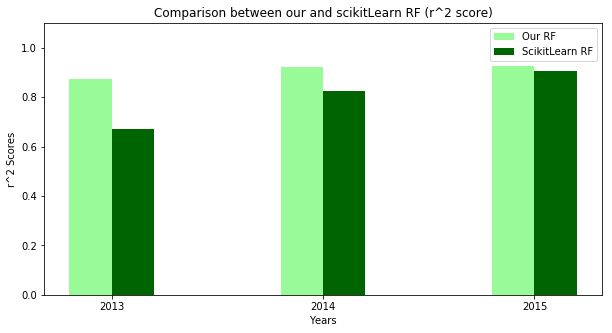

<Figure size 432x288 with 0 Axes>

In [21]:
RFr2scores = [RFr2score2013, RFr2score2014, RFr2score2015]
scikitRFr2Scores = [ScikitRFr2score2013, ScikitRFr2score2014, ScikitRFr2score2015]

ind = np.arange(3)  # the x locations for the groups
width = 0.2

fig, ax = plt.subplots(figsize = (10,5))
rects1 = ax.bar(ind - width/2, RFr2scores, width, label='Our RF', color = 'palegreen')
rects2 = ax.bar(ind + width/2, scikitRFr2Scores, width, label='ScikitLearn RF', color = 'darkgreen')

ax.set_ylabel('r^2 Scores')
plt.ylim(top = 1.1)
ax.set_xlabel('Years')
ax.set_title('Comparison between our and scikitLearn RF (r^2 score)')
ax.set_xticks(ind)
ax.set_xticklabels(('2013', '2014', '2015'))
ax.legend()
plt.show()
plt.savefig('123')

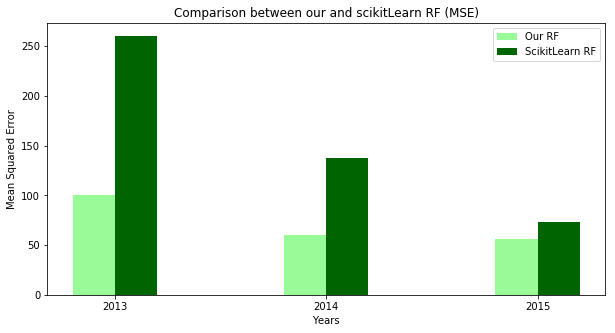

<Figure size 432x288 with 0 Axes>

In [22]:
RFmse = [RFmse2013, RFmse2014, RFmse2015]
scikitRFmse = [ScikitRFmse2013, ScikitRFmse2014, ScikitRFmse2015]

ind = np.arange(3)  # the x locations for the groups
width = 0.2

fig, ax = plt.subplots(figsize = (10,5))
rects1 = ax.bar(ind - width/2, RFmse, width, label='Our RF', color = 'palegreen')
rects2 = ax.bar(ind + width/2, scikitRFmse, width, label='ScikitLearn RF', color = 'darkgreen')

ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('Years')
ax.set_title('Comparison between our and scikitLearn RF (MSE)')
ax.set_xticks(ind)
ax.set_xticklabels(('2013', '2014', '2015'))
ax.legend()
plt.show()
plt.savefig('mse', dpi = 100)

In [23]:
numTrees = [1,5,10,20,30,40,50,60,70,80,90,100]
avgErrors = []

errors2013 = []
errors2014 = []
errors2015 = []

for n in numTrees: 
    
    RF1 = TreeEnsemble(x = xTrainNo2013, y = yTrainNo2013, nTrees = n, sampleSize = 500, minLeaf = 5)
    preds2013 = RF1.predict(xTrain2013)
    mae2013 = metrics.mean_absolute_error(yTrain2013, preds2013)
    
    RF2 = TreeEnsemble(x = xTrainNo2014, y = yTrainNo2014, nTrees = n, sampleSize = 500, minLeaf = 5)
    preds2014 = RF2.predict(xTrain2014)
    mae2014 = metrics.mean_absolute_error(yTrain2014, preds2014)

    RF3 = TreeEnsemble(x = xTrainNo2015, y = yTrainNo2015, nTrees = n, sampleSize = 500, minLeaf = 5)
    preds2015 = RF3.predict(xTrain2015)
    mae2015 = metrics.mean_absolute_error(yTrain2015, preds2015)

    avgErrors.append((mae2013 + mae2014 + mae2015)/3)

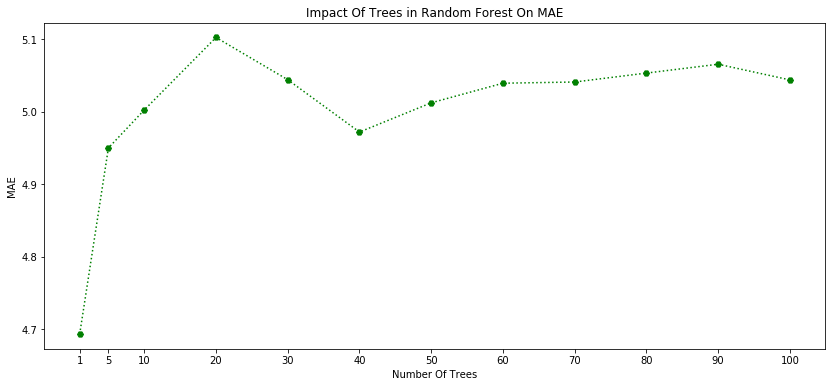

In [24]:
plt.figure(figsize = (14,6))
plt.title('Impact Of Trees in Random Forest On MAE')
plt.xlabel('Number Of Trees')
plt.ylabel('MAE')
plt.xticks(numTrees)
plt.plot(numTrees, avgErrors,'gH:')
plt.show()

In [13]:
numLeafs = [1,5,25,50,100,150,200,250]
avgErrorsLeafs = []

errors2013 = []
errors2014 = []
errors2015 = []

for n in numLeafs: 
    
    RF1 = TreeEnsemble(x = xTrainNo2013, y = yTrainNo2013, nTrees = 1, sampleSize = 500, minLeaf = n)
    preds2013 = RF1.predict(xTrain2013)
    mae2013 = metrics.mean_absolute_error(yTrain2013, preds2013)
    
    RF2 = TreeEnsemble(x = xTrainNo2014, y = yTrainNo2014, nTrees = 1, sampleSize = len(xTrain), minLeaf = n)
    preds2014 = RF2.predict(xTrain2014)
    mae2014 = metrics.mean_absolute_error(yTrain2014, preds2014)

    RF3 = TreeEnsemble(x = xTrainNo2015, y = yTrainNo2015, nTrees = 1, sampleSize = len(xTrain), minLeaf = n)
    preds2015 = RF3.predict(xTrain2015)
    mae2015 = metrics.mean_absolute_error(yTrain2015, preds2015)

    avgErrorsLeafs.append((mae2013 + mae2014 + mae2015)/3)

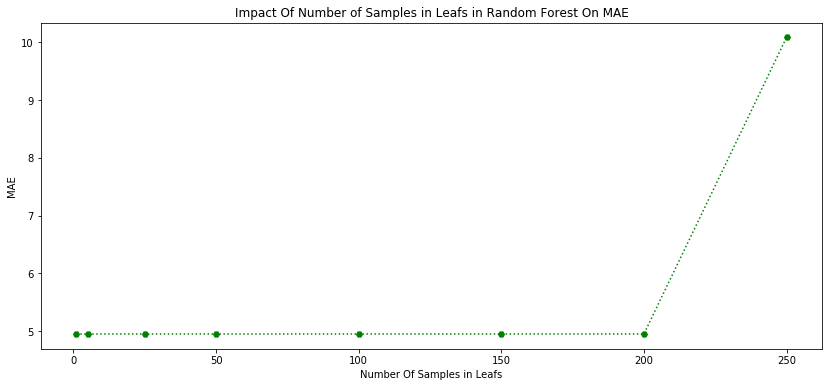

In [14]:
plt.figure(figsize = (14,6))
plt.title('Impact Of Number of Samples in Leafs in Random Forest On MAE')
plt.xlabel('Number Of Samples in Leafs')
plt.ylabel('MAE')
plt.plot(numLeafs, avgErrorsLeafs,'gH:')
plt.show()